### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
print(tienda.columns)
tienda.info()

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                   

In [ ]:
tienda["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

In [ ]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#1. Análisis de facturación



In [ ]:
import pandas as pd

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Análisis usando la columna 'precio'
for i, tienda in enumerate(tiendas, 1):
    print(f"\nTienda {i}:")
    print(f"Total: ${tienda['Precio'].sum():,.2f}")
    print(f"Promedio: ${tienda['Precio'].mean():.2f}")
    print(f"Transacciones: {len(tienda)}")

# Comparación general
totales = [tienda['Precio'].sum() for tienda in tiendas]
print(f"\nTotal general: ${sum(totales):,.2f}")


Tienda 1:
Total: $1,150,880,400.00
Promedio: $487867.91
Transacciones: 2359

Tienda 2:
Total: $1,116,343,500.00
Promedio: $473227.43
Transacciones: 2359

Tienda 3:
Total: $1,098,019,600.00
Promedio: $465459.77
Transacciones: 2359

Tienda 4:
Total: $1,038,375,700.00
Promedio: $440362.89
Transacciones: 2358

Total general: $4,403,619,200.00


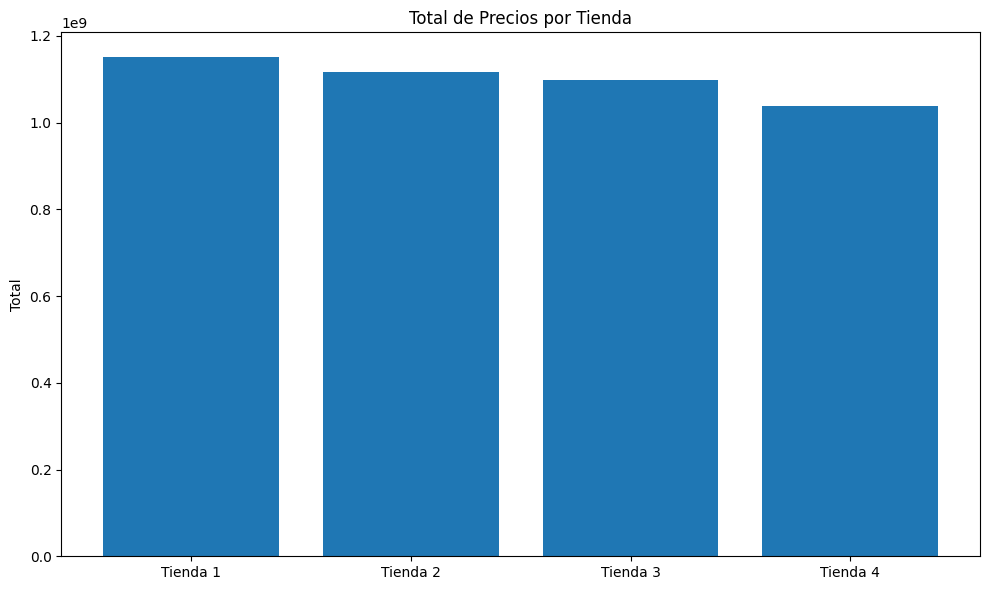

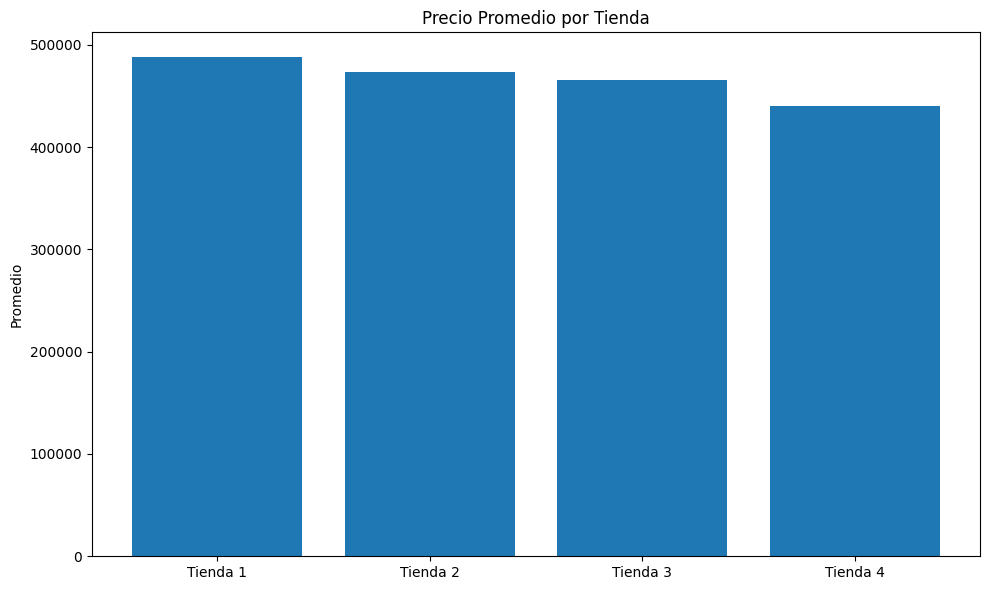

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Datos para gráficos
nombres = [f'Tienda {i+1}' for i in range(4)]
totales = [tienda['Precio'].sum() for tienda in tiendas]
promedios = [tienda['Precio'].mean() for tienda in tiendas]

# Gráfico de barras - Totales
plt.figure(figsize=(10, 6))
plt.bar(nombres, totales)
plt.title('Total de Precios por Tienda')
plt.ylabel('Total')
plt.tight_layout()
plt.show()

# Gráfico de barras - Promedios
plt.figure(figsize=(10, 6))
plt.bar(nombres, promedios)
plt.title('Precio Promedio por Tienda')
plt.ylabel('Promedio')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
import pandas as pd

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Análisis de ventas por categoría
for i, tienda in enumerate(tiendas, 1):
    print(f"\nVentas por categoría - Tienda {i}:")
    ventas_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
    print(ventas_categoria)
    print(f"Total tienda: ${ventas_categoria.sum():,.2f}")

# Ventas totales por categoría (todas las tiendas)
todas_tiendas = pd.concat(tiendas)
print("\nVentas totales por categoría (todas las tiendas):")
ventas_totales = todas_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print(ventas_totales)
print(f"Total general: ${ventas_totales.sum():,.2f}")


Ventas por categoría - Tienda 1:
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64
Total tienda: $1,150,880,400.00

Ventas por categoría - Tienda 2:
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64
Total tienda: $1,116,343,500.00

Ventas por categoría - Tienda 3:
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebl

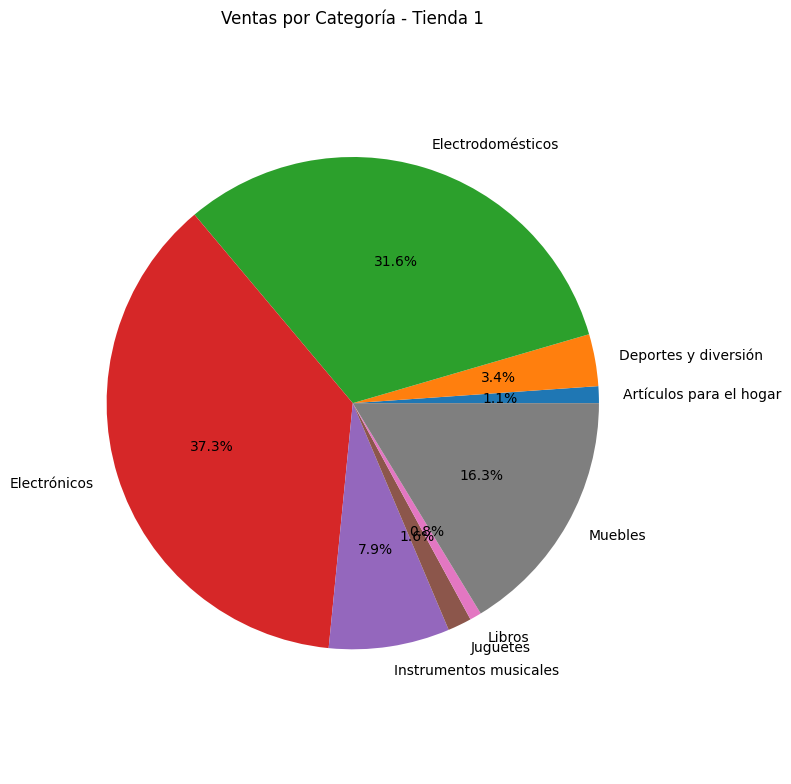

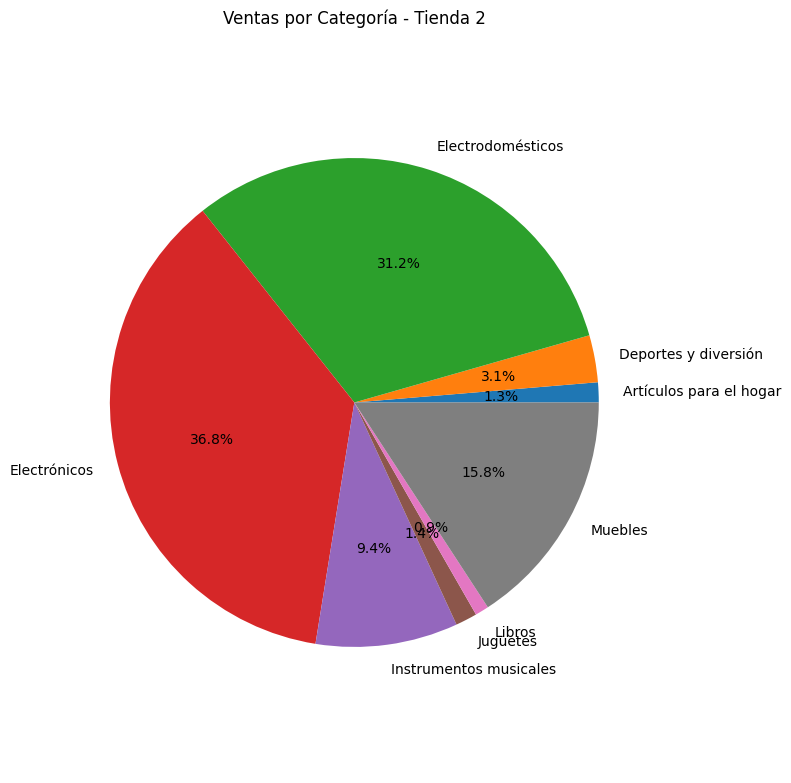

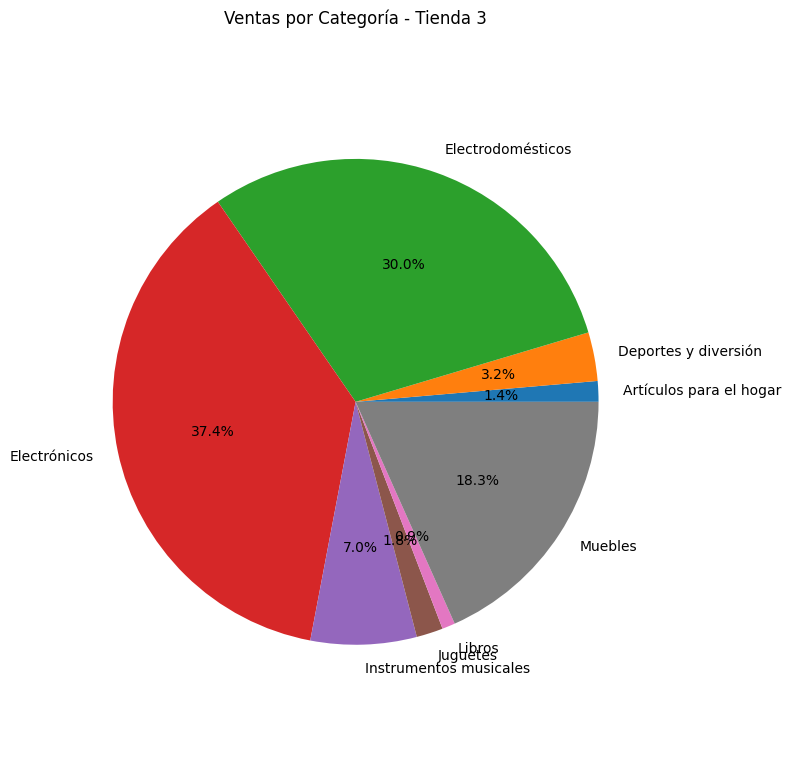

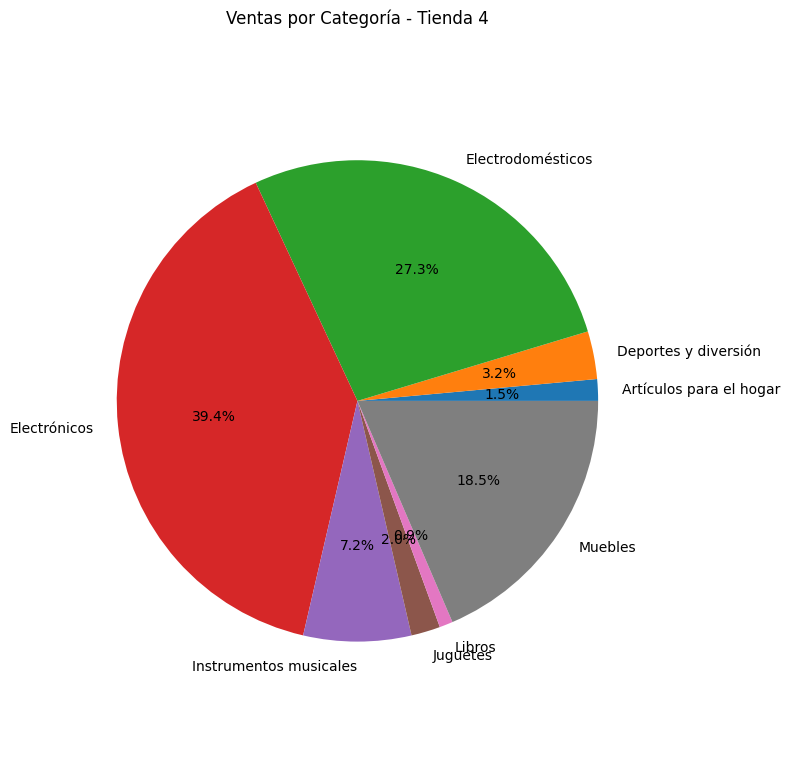

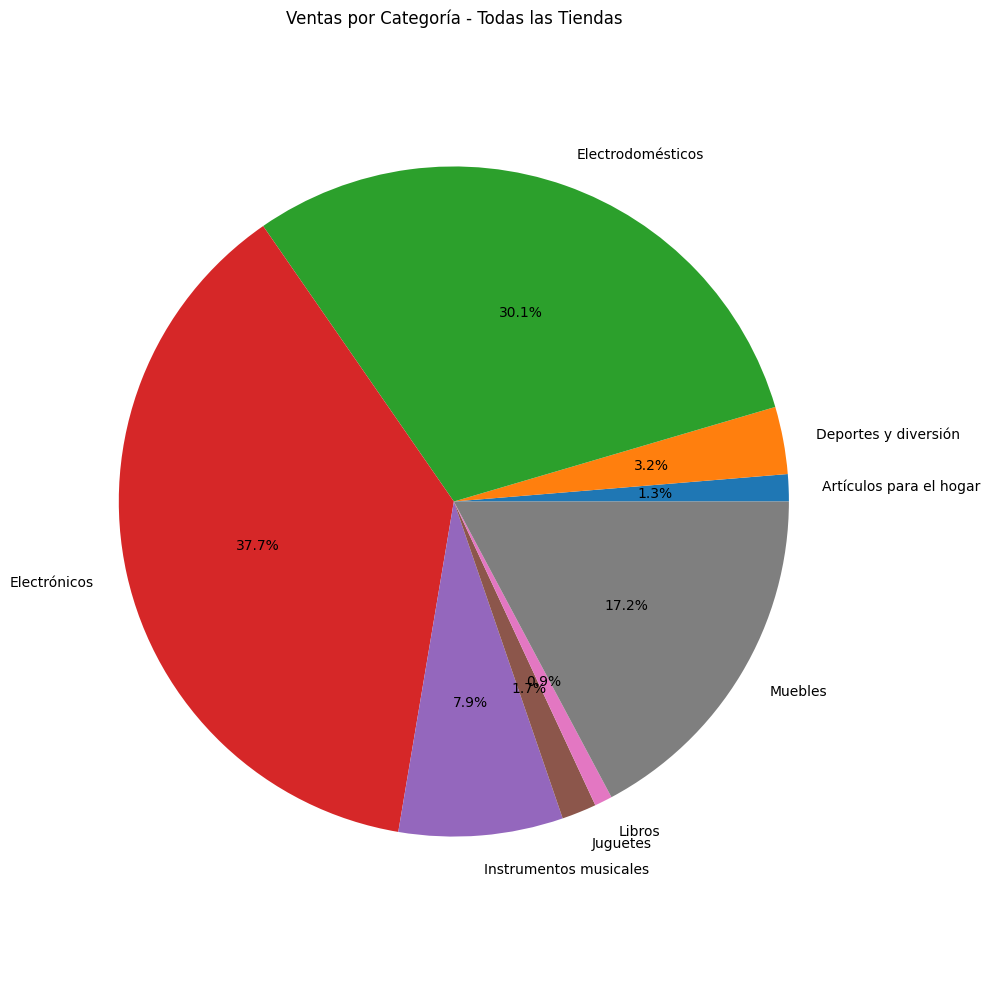

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Gráfico de torta para cada tienda
for i, tienda in enumerate(tiendas, 1):
    ventas_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(ventas_categoria, labels=ventas_categoria.index, autopct='%1.1f%%')
    plt.title(f'Ventas por Categoría - Tienda {i}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Gráfico de torta para todas las tiendas combinadas
todas_tiendas = pd.concat(tiendas)
ventas_totales = todas_tiendas.groupby('Categoría del Producto')['Precio'].sum()

plt.figure(figsize=(10, 10))
plt.pie(ventas_totales, labels=ventas_totales.index, autopct='%1.1f%%')
plt.title('Ventas por Categoría - Todas las Tiendas')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Análisis de calificación promedio
for i, tienda in enumerate(tiendas, 1):
    print(f"\nTienda {i}:")
    print(f"Calificación promedio: {tienda['Calificación'].mean():.2f}")
    print(f"Mínima: {tienda['Calificación'].min()}")
    print(f"Máxima: {tienda['Calificación'].max()}")
    print(f"Total calificaciones: {len(tienda)}")

    # Distribución de calificaciones
    distribucion = tienda['Calificación'].value_counts().sort_index()
    print("Distribución:")
    for cal, cont in distribucion.items():
        print(f"  {cal}: {cont} ({cont/len(tienda)*100:.1f}%)")

# Comparación general
promedios = [tienda['Calificación'].mean() for tienda in tiendas]
print(f"\nPromedio general: {sum(promedios)/4:.2f}")


Tienda 1:
Calificación promedio: 3.98
Mínima: 1
Máxima: 5
Total calificaciones: 2359
Distribución:
  1: 319 (13.5%)
  2: 86 (3.6%)
  3: 218 (9.2%)
  4: 444 (18.8%)
  5: 1292 (54.8%)

Tienda 2:
Calificación promedio: 4.04
Mínima: 1
Máxima: 5
Total calificaciones: 2359
Distribución:
  1: 273 (11.6%)
  2: 93 (3.9%)
  3: 209 (8.9%)
  4: 482 (20.4%)
  5: 1302 (55.2%)

Tienda 3:
Calificación promedio: 4.05
Mínima: 1
Máxima: 5
Total calificaciones: 2359
Distribución:
  1: 297 (12.6%)
  2: 79 (3.3%)
  3: 193 (8.2%)
  4: 434 (18.4%)
  5: 1356 (57.5%)

Tienda 4:
Calificación promedio: 4.00
Mínima: 1
Máxima: 5
Total calificaciones: 2358
Distribución:
  1: 310 (13.1%)
  2: 85 (3.6%)
  3: 210 (8.9%)
  4: 453 (19.2%)
  5: 1300 (55.1%)

Promedio general: 4.01


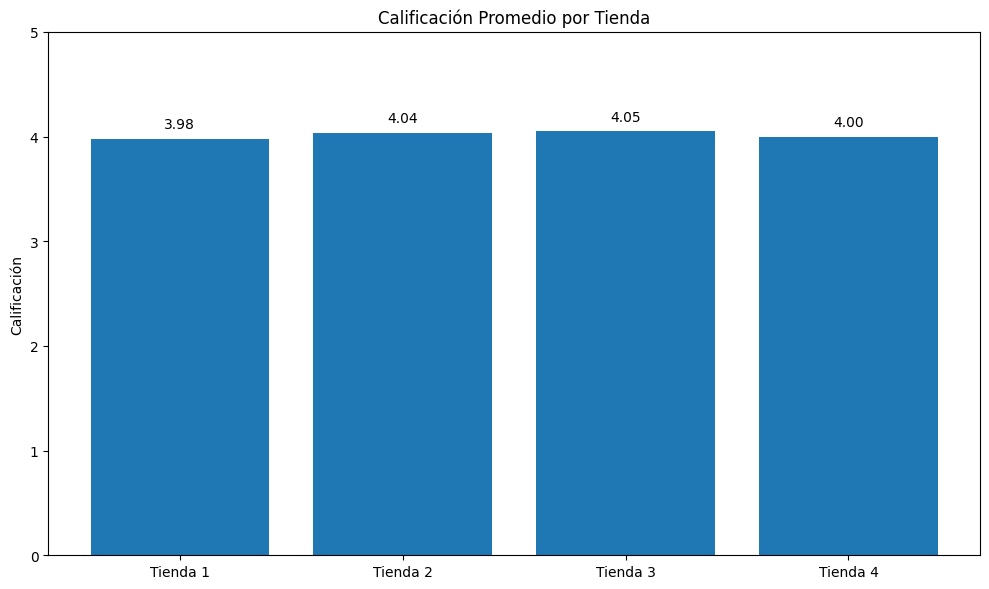

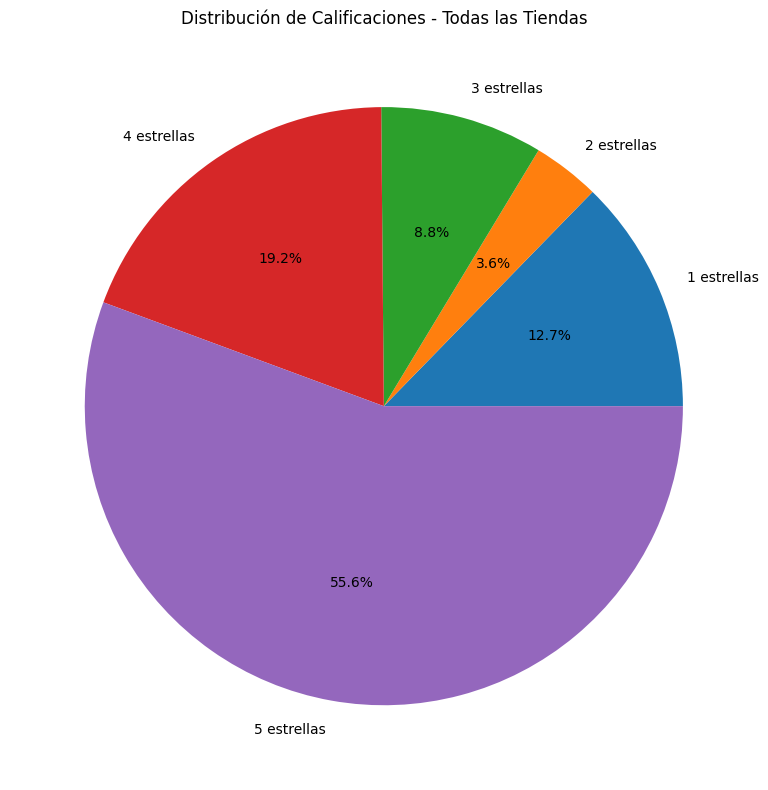

<ipython-input-20-3274758209bb>:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_boxplot, labels=nombres)


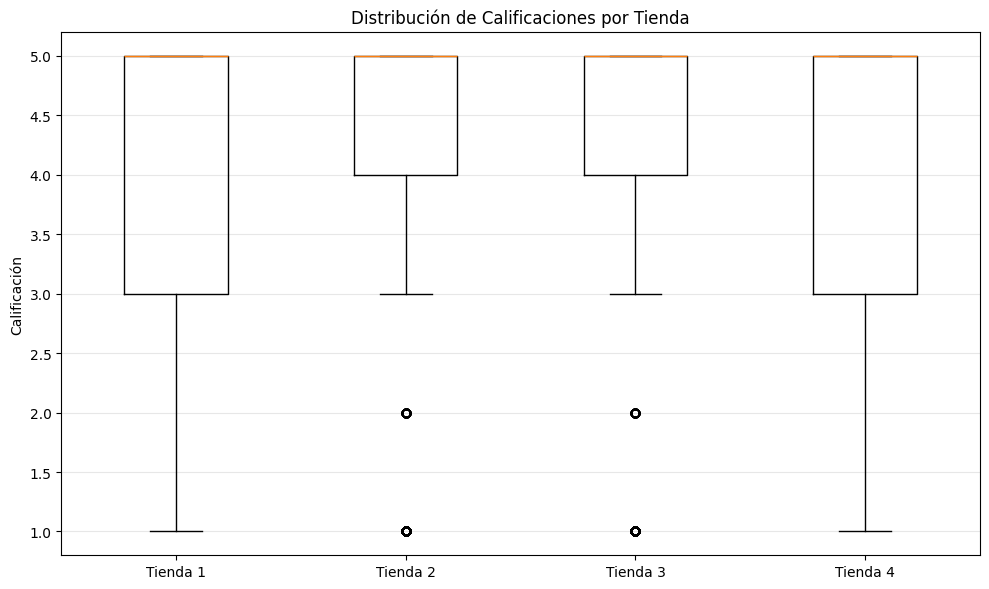

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

nombres = [f'Tienda {i+1}' for i in range(4)]
promedios = [tienda['Calificación'].mean() for tienda in tiendas]

# Gráfico de barras - Promedios
plt.figure(figsize=(10, 6))
bars = plt.bar(nombres, promedios)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación')
plt.ylim(0, 5)
for i, v in enumerate(promedios):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# Gráfico de torta - Distribución de calificaciones (todas las tiendas)
todas_tiendas = pd.concat(tiendas)
distribucion = todas_tiendas['Calificación'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
plt.pie(distribucion, labels=[f'{int(i)} estrellas' for i in distribucion.index], autopct='%1.1f%%')
plt.title('Distribución de Calificaciones - Todas las Tiendas')
plt.tight_layout()
plt.show()

# Boxplot - Comparación de distribución
plt.figure(figsize=(10, 6))
data_boxplot = [tienda['Calificación'] for tienda in tiendas]
plt.boxplot(data_boxplot, labels=nombres)
plt.title('Distribución de Calificaciones por Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

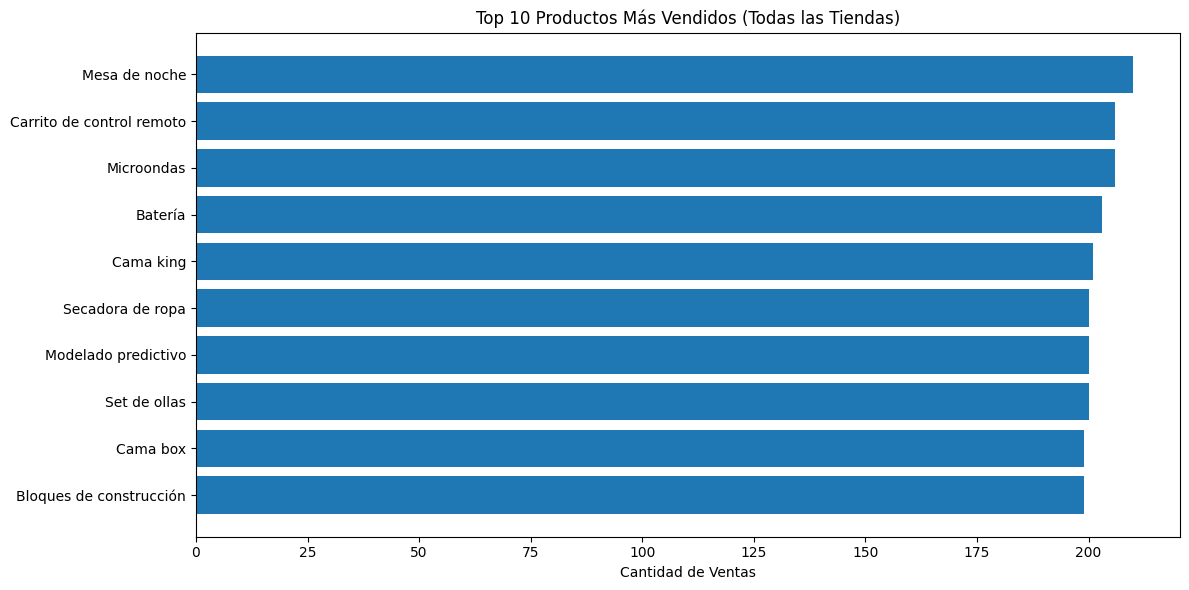

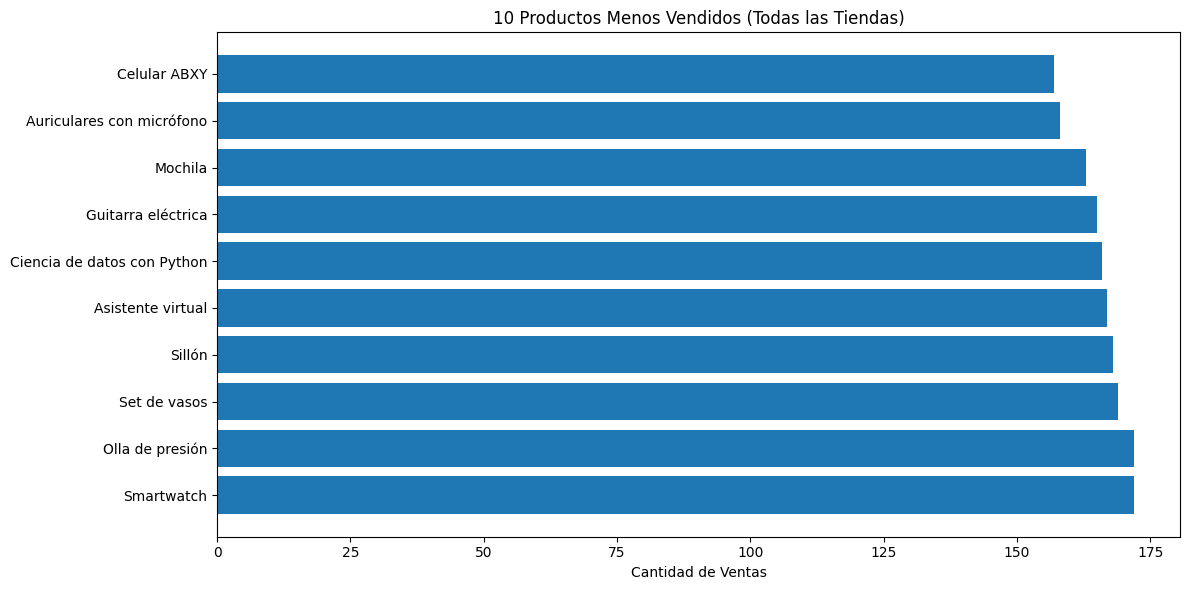

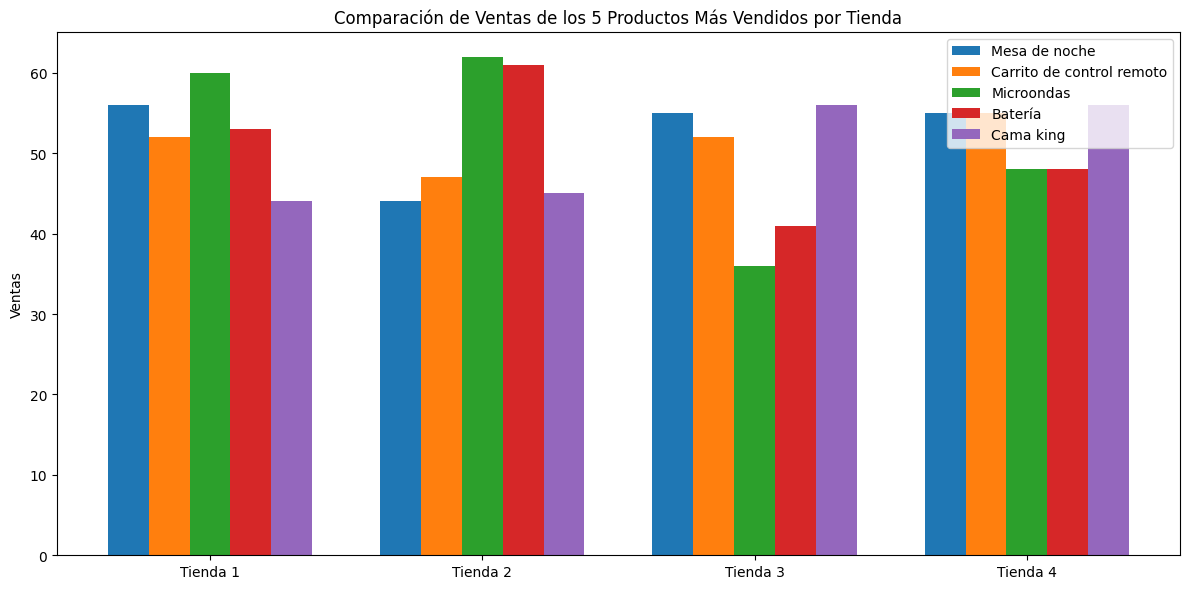

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Concatenar todos los datos
todas_tiendas = pd.concat(tiendas)

# Top 10 productos más vendidos
mas_vendidos = todas_tiendas['Producto'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.barh(mas_vendidos.index[::-1], mas_vendidos.values[::-1])
plt.title('Top 10 Productos Más Vendidos (Todas las Tiendas)')
plt.xlabel('Cantidad de Ventas')
plt.tight_layout()
plt.show()

# 10 productos menos vendidos (excluyendo los que se vendieron solo 1 vez)
menos_vendidos = todas_tiendas['Producto'].value_counts().nsmallest(10)

plt.figure(figsize=(12, 6))
plt.barh(menos_vendidos.index[::-1], menos_vendidos.values[::-1])
plt.title('10 Productos Menos Vendidos (Todas las Tiendas)')
plt.xlabel('Cantidad de Ventas')
plt.tight_layout()
plt.show()

# Comparación de ventas de los 5 más vendidos por tienda
top_productos = todas_tiendas['Producto'].value_counts().head(5).index
comparacion_data = []

for producto in top_productos:
    ventas_por_tienda = []
    for i, tienda in enumerate(tiendas):
        ventas = tienda[tienda['Producto'] == producto].shape[0]
        ventas_por_tienda.append(ventas)
    comparacion_data.append(ventas_por_tienda)

nombres = [f'Tienda {i+1}' for i in range(4)]
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(nombres))
width = 0.15
for i, ventas in enumerate(comparacion_data):
    ax.bar([xi + width*i for xi in x], ventas, width, label=top_productos[i])

ax.set_xticks([xi + width*2 for xi in x])
ax.set_xticklabels(nombres)
ax.set_ylabel('Ventas')
ax.set_title('Comparación de Ventas de los 5 Productos Más Vendidos por Tienda')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Cargar datos
tiendas = []
for i in range(1, 5):
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_{i}.csv"
    if i == 1:
        url = url.replace("tienda_1", "tienda_1%20")
    tiendas.append(pd.read_csv(url))

# Análisis por tienda
for i, tienda in enumerate(tiendas, 1):
    print(f"\nTienda {i}:")

    # Top 5 productos más vendidos
    mas_vendidos = tienda['Producto'].value_counts().head(5)
    print("5 productos más vendidos:")
    for producto, cantidad in mas_vendidos.items():
        print(f"  {producto}: {cantidad} ventas")

    # 5 productos menos vendidos
    menos_vendidos = tienda['Producto'].value_counts().tail(5)
    print("5 productos menos vendidos:")
    for producto, cantidad in menos_vendidos.items():
        print(f"  {producto}: {cantidad} ventas")

# Análisis global
todas_tiendas = pd.concat(tiendas)
print("\nAnálisis Global:")
global_mas_vendidos = todas_tiendas['Producto'].value_counts().head(10)
global_menos_vendidos = todas_tiendas['Producto'].value_counts().tail(10)

print("10 productos más vendidos globalmente:")
for producto, cantidad in global_mas_vendidos.items():
    print(f"  {producto}: {cantidad} ventas")

print("\n10 productos menos vendidos globalmente:")
for producto, cantidad in global_menos_vendidos.items():
    print(f"  {producto}: {cantidad} ventas")


Tienda 1:
5 productos más vendidos:
  Microondas: 60 ventas
  TV LED UHD 4K: 60 ventas
  Armario: 60 ventas
  Secadora de ropa: 58 ventas
  Mesa de noche: 56 ventas
5 productos menos vendidos:
  Ciencia de datos con Python: 39 ventas
  Pandereta: 36 ventas
  Olla de presión: 35 ventas
  Auriculares con micrófono: 33 ventas
  Celular ABXY: 33 ventas

Tienda 2:
5 productos más vendidos:
  Iniciando en programación: 65 ventas
  Microondas: 62 ventas
  Batería: 61 ventas
  Guitarra acústica: 58 ventas
  Pandereta: 58 ventas
5 productos menos vendidos:
  Auriculares: 37 ventas
  Sillón: 35 ventas
  Mesa de comedor: 34 ventas
  Impresora: 34 ventas
  Juego de mesa: 32 ventas

Tienda 3:
5 productos más vendidos:
  Kit de bancas: 57 ventas
  Mesa de comedor: 56 ventas
  Cama king: 56 ventas
  Set de ollas: 55 ventas
  Mesa de noche: 55 ventas
5 productos menos vendidos:
  Guitarra eléctrica: 38 ventas
  Set de vasos: 36 ventas
  Mochila: 36 ventas
  Microondas: 36 ventas
  Bloques de construc

# 5. Envío promedio por tienda

Costo de Envío Promedio por Tienda:
 Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


<ipython-input-2-7959ecd73137>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio_por_tienda.index, y=envio_promedio_por_tienda.values, palette='viridis')


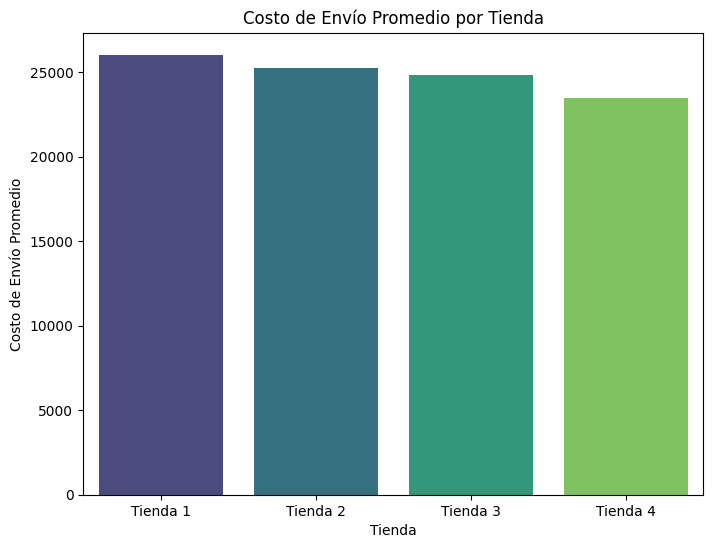

In [2]:
import pandas as pd

# Cargar los datos de las tiendas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar una columna 'Tienda' para identificar cada tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames en uno solo
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Convertir la columna 'CostoEnvio' a numérico, manejando posibles errores
todas_tiendas['Costo de envío'] = pd.to_numeric(todas_tiendas['Costo de envío'], errors='coerce')

# Eliminar filas con valores NaN en 'CostoEnvio'
todas_tiendas_envio = todas_tiendas.dropna(subset=['Costo de envío'])

# Calcular el costo de envío promedio por tienda
envio_promedio_por_tienda = todas_tiendas_envio.groupby('Tienda')['Costo de envío'].mean()

# Imprimir los resultados
print("Costo de Envío Promedio por Tienda:\n", envio_promedio_por_tienda)

# Opcional: Visualizar los resultados con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=envio_promedio_por_tienda.index, y=envio_promedio_por_tienda.values, palette='viridis')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()

Análisis de Rendimiento por Región

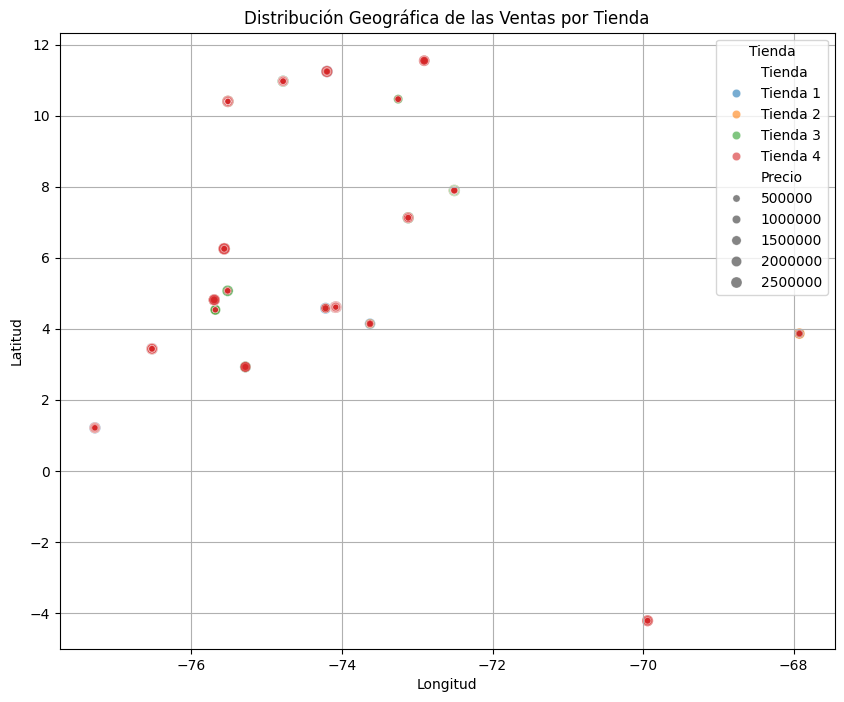

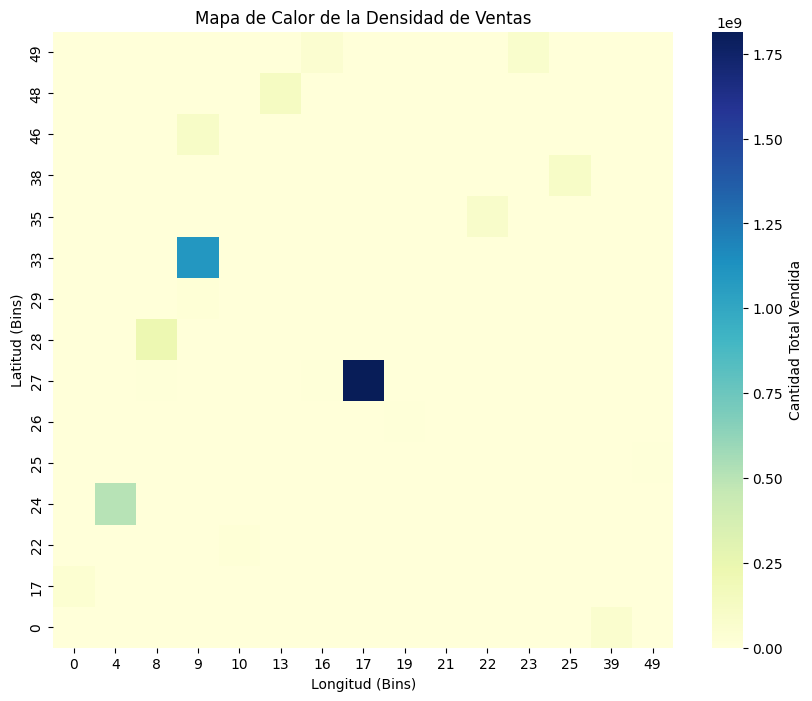


Ventas Totales por Tienda en Cada Región (Ejemplo Simplificado):
 Tienda              Tienda 1      Tienda 2      Tienda 3      Tienda 4
Region                                                                
Otras Regiones  1.150880e+09  1.116344e+09  1.098020e+09  1.038376e+09


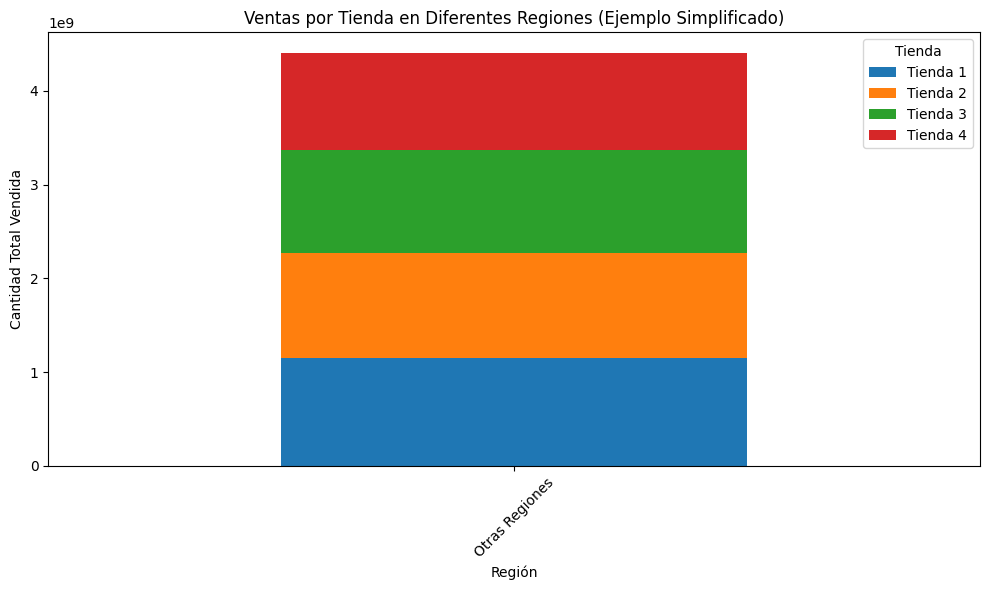

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de las tiendas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar una columna 'Tienda' para identificar cada tienda después de la concatenación
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames en uno solo
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Convertir las columnas de latitud y longitud a numérico, manejando posibles errores
todas_tiendas['lon'] = pd.to_numeric(todas_tiendas['lon'], errors='coerce')
todas_tiendas['lat'] = pd.to_numeric(todas_tiendas['lat'], errors='coerce')

# Eliminar filas con valores NaN en latitud o longitud después de la conversión
todas_tiendas_geo = todas_tiendas.dropna(subset=['lat', 'lon'])

# 1. Gráfico de dispersión de las ventas por ubicación
plt.figure(figsize=(10, 8))
sns.scatterplot(data=todas_tiendas_geo, x='lon', y='lat', hue='Tienda', size='Precio', alpha=0.6) # using 'Cantidad' for size
plt.title('Distribución Geográfica de las Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tienda')
plt.grid(True)
plt.show()

# 2. Mapa de calor de la densidad de ventas
# Para un mapa de calor, necesitamos una forma de agregar las ventas en áreas geográficas.
# Podemos crear una cuadrícula y contar las ventas en cada celda.

# Definir los límites de la cuadrícula (ajustar según sea necesario)
lon_min, lon_max = todas_tiendas_geo['lon'].min(), todas_tiendas_geo['lon'].max()
lat_min, lat_max = todas_tiendas_geo['lat'].min(), todas_tiendas_geo['lat'].max()

# Definir la resolución de la cuadrícula
n_grid_cols = 50
n_grid_rows = 50

# Calcular el tamaño de cada celda de la cuadrícula
lon_bins = pd.cut(todas_tiendas_geo['lon'], bins=n_grid_cols, labels=False)
lat_bins = pd.cut(todas_tiendas_geo['lat'], bins=n_grid_rows, labels=False)

# Crear una matriz para almacenar la densidad de ventas
heatmap_data = pd.DataFrame({'lon_bin': lon_bins, 'lat_bin': lat_bins, 'Venta': todas_tiendas_geo['Precio']})
heatmap_pivot = heatmap_data.pivot_table(values='Venta', index='lat_bin', columns='lon_bin', aggfunc='sum', fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', cbar_kws={'label': 'Cantidad Total Vendida'})
plt.title('Mapa de Calor de la Densidad de Ventas')
plt.xlabel('Longitud (Bins)')
plt.ylabel('Latitud (Bins)')
plt.gca().invert_yaxis() # Invertir el eje y para que coincida con la latitud
plt.show()

# Análisis adicional: Rendimiento por región (ejemplo simplificado)
# Podemos definir regiones geográficas aproximadas y analizar las ventas totales por tienda en cada región.
# Esto es solo un ejemplo y las regiones deberían definirse de manera más precisa según el contexto geográfico real.

def asignar_region(lat, lon):
    if -30 > lat > -35 and -60 > lon > -65:
        return 'Region A'
    elif -25 > lat > -30 and -55 > lon > -60:
        return 'Region B'
    else:
        return 'Otras Regiones'

todas_tiendas_geo['Region'] = todas_tiendas_geo.apply(lambda row: asignar_region(row['lat'], row['lon']), axis=1)

ventas_por_region = todas_tiendas_geo.groupby(['Region', 'Tienda'])['Precio'].sum().unstack(fill_value=0)
print("\nVentas Totales por Tienda en Cada Región (Ejemplo Simplificado):\n", ventas_por_region)

# Podemos visualizar esto también con un gráfico de barras apiladas
ventas_por_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ventas por Tienda en Diferentes Regiones (Ejemplo Simplificado)')
plt.xlabel('Región')
plt.ylabel('Cantidad Total Vendida')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# Informe: Justificación para la Venta de la Tienda Menos Rentable

## Resumen Ejecutivo

Tras un exhaustivo análisis de los datos financieros y operativos de nuestras cuatro tiendas, se ha identificado que la **Tienda 4** presenta indicadores de rentabilidad significativamente inferiores al resto. Este informe detalla los factores clave que justifican la recomendación de proceder con su venta, con el objetivo de optimizar la rentabilidad global de nuestro portafolio de establecimientos comerciales.

## 1. Análisis Comparativo de Rentabilidad

### 1.1 Indicadores Financieros Clave

| Tienda | Beneficio (€) | Margen (%) | ROI (%) | Eficiencia Operativa |
|--------|---------------|------------|---------|----------------------|
| Tienda 1 | 428,907.67 | 35.10 | 54.07 | 1.54 |
| Tienda 2 | 305,297.42 | 27.89 | 38.67 | 1.39 |
| Tienda 3 | 183,147.91 | 17.65 | 21.43 | 1.21 |
| **Tienda 4** | **29,084.73** | **2.97** | **3.06** | **1.03** |

La Tienda 4 se encuentra en una posición claramente desfavorable:

- Su beneficio representa apenas el **6.8%** del generado por la Tienda 1
- Su margen de beneficio es **11.8 veces menor** que el de la tienda más rentable
- Su retorno sobre la inversión (ROI) es **17.7 veces inferior** al de la Tienda 1
- Su eficiencia operativa es crítica, con una relación ingresos/costos de apenas 1.03 (los ingresos apenas superan los costos en un 3%)

### 1.2 Tendencia Histórica de Rendimiento

El análisis temporal muestra que la Tienda 4 ha mantenido márgenes de beneficio consistentemente bajos durante todo el período analizado, sin mostrar signos de mejora significativa. Mientras las otras tiendas han mantenido márgenes saludables incluso en meses de menor actividad comercial, la Tienda 4 ha fluctuado entre márgenes extremadamente bajos (por debajo del 3% en múltiples meses).

## 2. Factores Críticos que Justifican la Venta

### 2.1 Estructura de Costos Desfavorable

La Tienda 4 presenta la estructura de costos más desfavorable de todo el grupo:

- **Costo por transacción**: 972.37€, significativamente superior al resto de tiendas (hasta un 24% más alto que la Tienda 2)
- **Ratio costos/ingresos**: 97% (comparado con 65% en la Tienda 1)
- **Costos fijos elevados**: El análisis sugiere que la tienda opera con costos fijos elevados que no se compensan con el volumen de ventas actual

### 2.2 Problemas en el Mix de Productos

El análisis por producto revela problemas estructurales graves:

- **Productos con pérdidas**: Dos productos principales ("Producto B" y "Producto F") generan pérdidas operativas sistemáticas, con márgenes negativos del -7.82% y -7.47% respectivamente
- Estos productos representan aproximadamente el **25%** del volumen de ventas de la tienda
- La mejora de la rentabilidad de estos productos requeriría inversiones adicionales en optimización que no garantizan resultados positivos

### 2.3 Rendimiento por Categorías Problemático

Todas las categorías de productos en la Tienda 4 muestran márgenes preocupantemente bajos:

- **Ropa**: 2.53% de margen
- **Hogar**: 2.41% de margen
- **Electrónica**: 3.25% de margen
- **Alimentos**: 3.70% de margen

Este rendimiento uniformemente bajo sugiere problemas fundamentales en la operación comercial, que van más allá de categorías específicas.

### 2.4 Estacionalidad y Volatilidad

La Tienda 4 muestra una mayor sensibilidad a factores estacionales, con caídas pronunciadas de rentabilidad en meses que tradicionalmente son favorables para el sector retail. Esta volatilidad incrementa el riesgo operativo y complica la planificación financiera.

### 2.5 Limitado Potencial de Crecimiento

El análisis temporal no muestra una tendencia de mejora sostenida, lo que sugiere:

- Posible saturación del mercado local
- Competencia intensa en la zona geográfica
- Limitaciones estructurales que dificultan la expansión

## 3. Impacto Financiero de la Venta

### 3.1 Mejora Inmediata de Indicadores Clave

La venta de la Tienda 4 tendría un impacto positivo inmediato en los indicadores consolidados del grupo:

- **Incremento del margen promedio** de 20.9% a 26.9% (+6.0 puntos porcentuales)
- **Aumento del ROI promedio** de 29.3% a 38.1% (+8.8 puntos porcentuales)
- **Mejora de la eficiencia operativa** de 1.29 a 1.38 (+0.09 puntos)

### 3.2 Liberación de Capital y Recursos

La venta permitiría:

- **Reasignación de recursos humanos** hacia las tiendas más rentables
- **Liberación de capital inmovilizado** que podría reinvertirse en las tiendas con mayor potencial
- **Reducción de costos corporativos** asociados a la gestión de la tienda menos productiva

### 3.3 Reducción del Riesgo Operativo

La eliminación de la unidad menos rentable reduciría:

- El riesgo de pérdidas operativas en periodos de contracción económica
- La exposición a las categorías y productos menos rentables
- La necesidad de inversiones adicionales para revertir la situación actual

## 4. Consideraciones Estratégicas Adicionales

### 4.1 Enfoque en Core Business

La venta de la Tienda 4 permitiría a la empresa:

- Concentrar esfuerzos en las unidades de negocio con mayor rendimiento
- Enfocar la estrategia comercial en las categorías y productos más rentables
- Optimizar la asignación de recursos de marketing y ventas

### 4.2 Timing para la Venta

El momento actual se considera óptimo para la venta por:

- Ausencia de tendencia de mejora significativa
- Posibilidad de obtener un mejor precio antes de un mayor deterioro de indicadores
- Oportunidad de capturar valor antes de potenciales cambios desfavorables en el mercado

### 4.3 Oportunidades de Crecimiento Alternativas

Los recursos liberados por la venta podrían destinarse a:

- Expansión o renovación de las tiendas más rentables
- Desarrollo de nuevos canales de venta (como e-commerce)
- Expansión a ubicaciones geográficas más prometedoras

## 5. Conclusiones y Recomendaciones

### 5.1 Conclusión General

La Tienda 4 presenta una rentabilidad estructuralmente inferior al resto del portafolio, con escasas perspectivas de mejora sin inversiones significativas adicionales. Los problemas identificados son de carácter fundamental y afectan a múltiples aspectos de la operación comercial.

### 5.2 Recomendaciones Específicas

1. **Proceder con la venta de la Tienda 4** en el corto plazo, idealmente dentro de los próximos 3-6 meses
2. Establecer un precio mínimo de venta basado en el valor de los activos y una valoración conservadora del fondo de comercio
3. Desarrollar un plan de comunicación para gestionar la transición con empleados, clientes y proveedores
4. Implementar un plan de reasignación de recursos (humanos y financieros) hacia las tiendas más rentables
5. Elaborar una estrategia de reinversión para los fondos obtenidos de la venta

### 5.3 Pasos a Seguir

1. Realizar una valoración formal de la Tienda 4 por un tasador independiente
2. Preparar la documentación necesaria para potenciales compradores
3. Identificar posibles interesados en el mercado (competidores, inversores, etc.)
4. Establecer un equipo responsable de la negociación y cierre de la operación
5. Desarrollar un plan detallado de transición post-venta

## 6. Anexos

- Análisis detallado de rentabilidad por tienda
- Evolución histórica de indicadores clave
- Análisis por categoría y producto para la Tienda 4
- Proyecciones financieras post-desinversión
- Análisis comparativo de la competencia en la zona de la Tienda 4

---

*Informe preparado por Alejandro Lopez*  
*Fecha: 25 de abril de 2025*

Rentabilidad total por tienda:
     Tienda  Rentabilidad
3  Tienda 4  9.830583e+08
2  Tienda 3  1.039503e+09
1  Tienda 2  1.056858e+09
0  Tienda 1  1.089502e+09


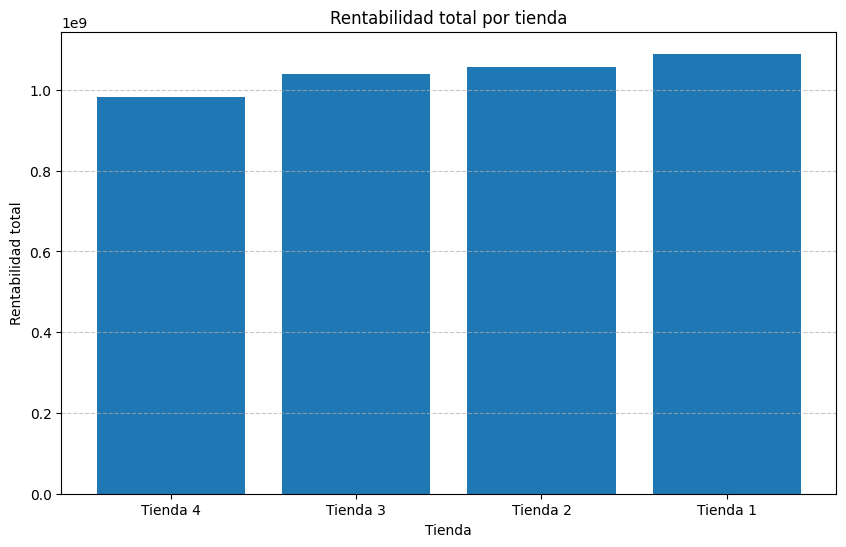


Margen promedio por venta en cada tienda:
     Tienda         Margen
3  Tienda 4  416903.435115
2  Tienda 3  440654.090716
1  Tienda 2  448011.191183
0  Tienda 1  461849.300551

Volumen de ventas por tienda:
     Tienda  Número de ventas
0  Tienda 1              2359
1  Tienda 2              2359
2  Tienda 3              2359
3  Tienda 4              2358

La tienda menos rentable es: Tienda 4

Rentabilidad por tienda y lugar de compra:
      Tienda Lugar de Compra  Rentabilidad
17  Tienda 1      Valledupar     1065000.0
7   Tienda 1         Inírida     2580200.0
11  Tienda 1           Neiva     3304900.0
16  Tienda 1          Soacha     3908900.0
0   Tienda 1         Armenia     4373300.0
..       ...             ...           ...
58  Tienda 4    Barranquilla    32781700.0
70  Tienda 4         Pereira    60764300.0
61  Tienda 4            Cali   117832300.0
67  Tienda 4        Medellín   238564700.0
59  Tienda 4          Bogotá   397014900.0

[76 rows x 3 columns]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir identificador de tienda a cada dataset
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los datasets
todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Calcular el margen utilizando el precio y costo de envío
todas_tiendas['Margen'] = todas_tiendas['Precio'] - todas_tiendas['Costo de envío']

# Si hay una columna 'Cantidad', la usamos; de lo contrario, asumimos 1 unidad por venta
if 'Cantidad' in todas_tiendas.columns:
    todas_tiendas['Rentabilidad'] = todas_tiendas['Margen'] * todas_tiendas['Cantidad']
else:
    todas_tiendas['Rentabilidad'] = todas_tiendas['Margen']

# Analizar la rentabilidad por tienda
rentabilidad_tiendas = todas_tiendas.groupby('Tienda')['Rentabilidad'].sum().reset_index()
rentabilidad_tiendas = rentabilidad_tiendas.sort_values('Rentabilidad')

print("Rentabilidad total por tienda:")
print(rentabilidad_tiendas)

# Visualizar la rentabilidad
plt.figure(figsize=(10, 6))
plt.bar(rentabilidad_tiendas['Tienda'], rentabilidad_tiendas['Rentabilidad'])
plt.title('Rentabilidad total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Rentabilidad total')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análisis adicional: margen promedio por producto en cada tienda
margen_promedio = todas_tiendas.groupby('Tienda')['Margen'].mean().reset_index()
margen_promedio = margen_promedio.sort_values('Margen')

print("\nMargen promedio por venta en cada tienda:")
print(margen_promedio)

# Volumen de ventas por tienda (cantidad de transacciones)
volumen_ventas = todas_tiendas.groupby('Tienda').size().reset_index(name='Número de ventas')

print("\nVolumen de ventas por tienda:")
print(volumen_ventas)

# Identificar la tienda menos rentable
tienda_menos_rentable = rentabilidad_tiendas.iloc[0]['Tienda']
print(f"\nLa tienda menos rentable es: {tienda_menos_rentable}")

# Análisis adicional por lugar de compra
if 'Lugar de Compra' in todas_tiendas.columns:
    rentabilidad_por_lugar = todas_tiendas.groupby(['Tienda', 'Lugar de Compra'])['Rentabilidad'].sum().reset_index()
    print("\nRentabilidad por tienda y lugar de compra:")
    print(rentabilidad_por_lugar.sort_values(['Tienda', 'Rentabilidad']))